In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

In [3]:
sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

In [4]:
columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']
sales = sales.reindex(columns=columns)

In [5]:
# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

sales = sales.drop_duplicates()

In [6]:
sales.head()

,transID,custID,prdtID,description,quantity,price,country,timestamp,date,day,day_num,month,time
0,536365,17850.0,85123A,white hanging heart t-light holder,6,2.55,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,17850.0,71053,white metal lantern,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,17850.0,84406B,cream cupid hearts coat hanger,8,2.75,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,17850.0,84029G,knitted union flag hot water bottle,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,17850.0,84029E,red woolly hottie white heart.,6,3.39,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [8]:
sales['cancelled'] = sales['transID'].str[0]

sales['cancelled'].value_counts()

5    527387
C      9251
A         3
Name: cancelled, dtype: int64

In [11]:
sales[sales['cancelled']=='C'].quantity.describe()

count     9251.000000
mean       -29.787050
std       1147.997592
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: quantity, dtype: float64

In [12]:
sales[sales['cancelled']=='A']

,transID,custID,prdtID,description,quantity,price,country,timestamp,date,day,day_num,month,time,cancelled
299982,A563185,NaN,B,adjust bad debt,1,11062.06,United Kingdom,2011-08-12 14:50:00,2011-08-12,Friday,12,August,14:50:00,A
299983,A563186,NaN,B,adjust bad debt,1,-11062.06,United Kingdom,2011-08-12 14:51:00,2011-08-12,Friday,12,August,14:51:00,A
299984,A563187,NaN,B,adjust bad debt,1,-11062.06,United Kingdom,2011-08-12 14:52:00,2011-08-12,Friday,12,August,14:52:00,A


In [14]:
sales['prdt'] = sales['prdtID'].str[0]
sales['prdt'].value_counts()

2    434001
8     62460
4     11373
1      7578
7      7151
3      5705
9      4638
P      1260
D       832
5       633
M       566
C       160
6       113
S        62
B        40
A        34
g        34
m         1
Name: prdt, dtype: int64

In [19]:
sales[sales['prdt']=='m'].description.value_counts()

manual    1
Name: description, dtype: int64

In [20]:
sales[sales['prdt']=='g'].description.value_counts()

dotcomgiftshop gift voucher £20.00    9
dotcomgiftshop gift voucher £10.00    8
dotcomgiftshop gift voucher £30.00    7
dotcomgiftshop gift voucher £50.00    4
dotcomgiftshop gift voucher £40.00    3
to push order througha s stock was    1
Name: description, dtype: int64

In [21]:
sales[sales['prdt']=='A'].description.value_counts()

amazon fee    34
Name: description, dtype: int64

In [22]:
sales[sales['prdt']=='B'].description.value_counts()

bank charges       37
adjust bad debt     3
Name: description, dtype: int64

In [23]:
sales[sales['prdt']=='S'].description.value_counts()

samples    62
Name: description, dtype: int64

In [24]:
sales[sales['prdt']=='6'].description.value_counts()

sombrero                           61
pink retro big flower bag          14
turq ice cream bum bag              8
pink/yellow flowers handbag         8
blue check bag w handle 34x20cm     6
elephant clip w suction cup         4
blue stripes shoulder bag           3
purple/turq flowers handbag         1
Name: description, dtype: int64

In [25]:
sales[sales['prdt']=='C'].description.value_counts()

carriage           143
cruk commission     16
Name: description, dtype: int64

In [26]:
sales[sales['prdt']=='M'].description.value_counts()

manual    566
Name: description, dtype: int64

In [27]:
sales[sales['prdt']=='5'].description.value_counts()

feather pen,hot pink            240
feather pen,coal black          180
feather pen,light pink          152
afghan slipper sock pair         23
summer fun design shower cap     19
stripy design shower cap         16
adjustment                        1
adjust                            1
Name: description, dtype: int64

In [28]:
sales[sales['prdt']=='D'].description.value_counts()

dotcom postage                  709
discount                         77
girls party bag                  13
boys party bag                   11
ebay                              5
boxed glass ashtray               4
sunjar led night night light      2
camouflage dog collar             1
ooh la la dogs collar             1
haynes camper shoulder bag        1
Name: description, dtype: int64

In [29]:
sales[sales['prdt']=='P'].description.value_counts()

postage                       1252
pads to match all cushions       4
Name: description, dtype: int64

In [31]:
# sales[sales['prdt']=='9'].description.value_counts()

In [33]:
!pip install wordcloud

In [35]:
prod = sales[~sales.description.isnull()]

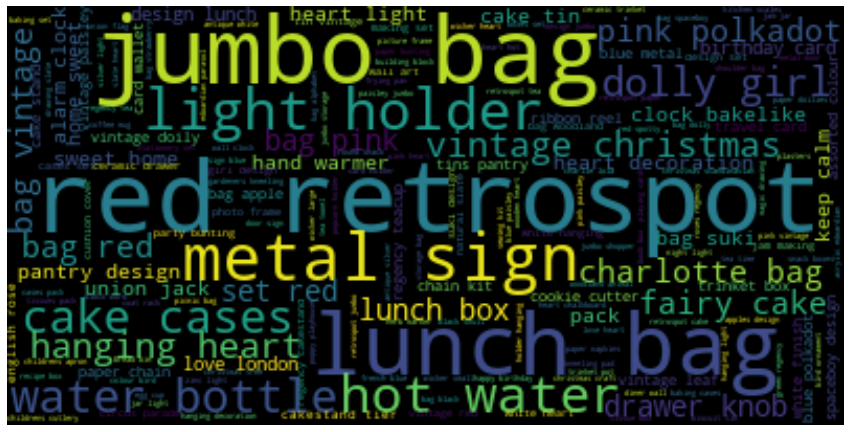

In [39]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=1000,margin=0).generate(' '.join(prod['description']))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
prdtcat = sales[['prdtID','timestamp','quantity','price','country']]

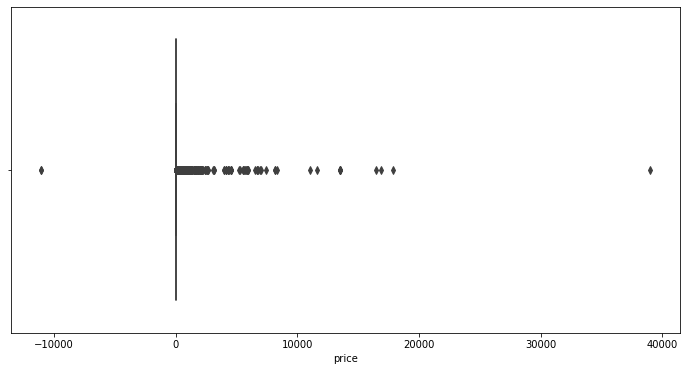

In [59]:
plt.subplots(figsize=(12,6))
sns.boxplot(prdtcat.price)
plt.show()

In [76]:
def categorize(x):
    if x <= 10:
        return 1
    elif x <= 100:
        return 2
    elif x <= 1000:
        return 3
    else:
        return 4

In [77]:
prdtcat['category'] = prdtcat['price'].apply(lambda x: categorize(x))

C:\Users\Riya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
prdtcat['category'].value_counts()

1    511687
2     23918
3       916
4       120
Name: category, dtype: int64

In [79]:
category1 = prdtcat[prdtcat['category']==1]
category2 = prdtcat[prdtcat['category']==2]
category3 = prdtcat[prdtcat['category']==3]
category4 = prdtcat[prdtcat['category']==4]

In [80]:
category2.head()

,prdtID,timestamp,quantity,price,country,category
45,POST,2010-12-01 08:45:00,3,18.00,France,2
65,21258,2010-12-01 09:09:00,32,10.95,United Kingdom,2
141,D,2010-12-01 09:41:00,-1,27.50,United Kingdom,2
151,22839,2010-12-01 09:45:00,2,14.95,United Kingdom,2
152,22838,2010-12-01 09:45:00,2,14.95,United Kingdom,2


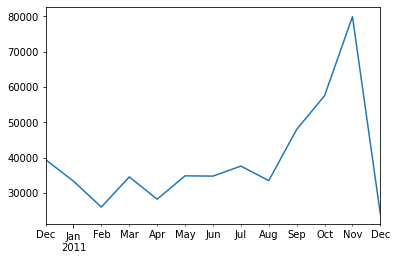

In [81]:
category1['timestamp'].value_counts().resample('M').sum().plot.line()

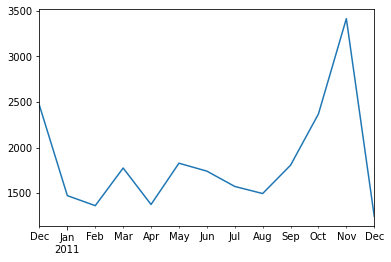

In [82]:
category2['timestamp'].value_counts().resample('M').sum().plot.line()

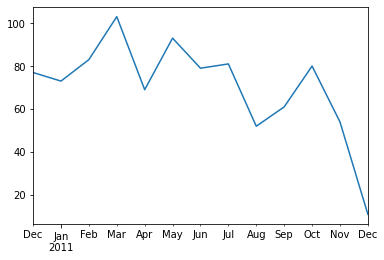

In [83]:
category3['timestamp'].value_counts().resample('M').sum().plot.line()

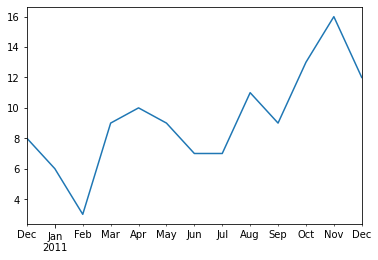

In [84]:
category4['timestamp'].value_counts().resample('M').sum().plot.line()

In [85]:
category1['quantity'].sum()

5103272

In [86]:
category2['quantity'].sum()

58534

In [87]:
category3['quantity'].sum()

709

In [88]:
category4['quantity'].sum()

-13

In [90]:
from collections import Counter

In [91]:
title_type = prdtcat.groupby('category').agg('quantity')
print(title_type)

In [92]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [95]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)

<Figure size 1440x720 with 0 Axes>

In [96]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

NameError: name 'type_counts' is not defined

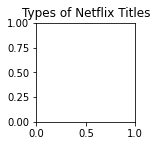

In [97]:
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Netflix Titles')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

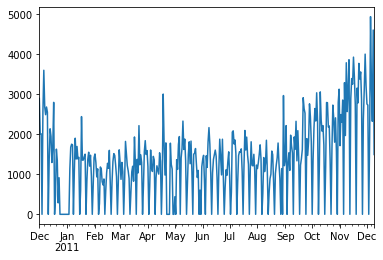

In [99]:
category1['timestamp'].value_counts().resample('D').sum().plot.line()